# LMS EXPLORATION 01

# 1-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

## 필요 라이브러리 import

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
from PIL import Image
import os,glob

print("PIL 라이브러리 import 완료")

PIL 라이브러리 import 완료


In [3]:
import random

## 학습 데이터 불러오기 + Resize 하기

In [4]:
# train 이미지 사이즈 변경

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized")
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized")
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료")

111 images to be resized
111 images resized
가위 이미지 resize 완료
101 images to be resized
101 images resized
바위 이미지 resize 완료
102 images to be resized
102 images resized
보 이미지 resize 완료


In [ ]:
# Keras 에서 위에 리사이즈한 데이터를 가지고 학습 수 있도록

# 이미지 정보를 행렬에 담아주고 그에 따른 함수도 만들어 줍니다.

# 우선 행렬을 생성해 반복문으로 이미지 정보를 넣어주고 지도학습을 위해

# 가위, 바위, 보를 각각 0, 1, 2로 라벨링 해줍니다.

# 이후, 만든 함수를 실제로 실행하고 0과 1 사이의 값으로 정규화까지 해줍니다.

In [5]:
# import numpy 라이브러리

import numpy as np

# 함수 정의 및 가위, 바위, 보 라벨링

def load_data(img_path, number_of_data=314):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# 0과 1 사이의 값으로 정규화
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

#출력
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 314 입니다.
최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0
x_train shape: (314, 28, 28, 3)
y_train shape: (314,)


라벨:  0


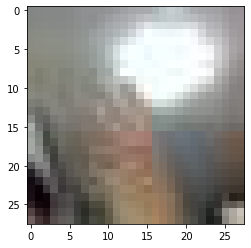

In [6]:
# 확인을 위한 이미지 출력

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계, 학습 모델 훈련 진행

In [8]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 테스트
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print("train_loss: {} ".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

# 테스트 데이터 불러오기 + Resize 하기

In [9]:
# train 이미지 사이즈 변경

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("rock_test 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("scissor_test 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("paepr_test 이미지 resize 완료!")

101  images to be resized.
101  images resized.
rock_test 이미지 resize 완료!
100  images to be resized.
100  images resized.
scissor_test 이미지 resize 완료!
100  images to be resized.
100  images resized.
paepr_test 이미지 resize 완료!


# 테스트 데이터의 라벨링 및 정규화 훈련 진행

In [10]:
# 함수 정의 및 가위, 바위, 보 라벨링

def load_data(img_path, number_of_data=301):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# 0과 1 사이의 값으로 정규화
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test))
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print('최소값:',np.min(x_test_norm), ' 최대값:',np.max(x_test_norm))

# 출력
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 301 입니다.
최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0
x_test shape: (301, 28, 28, 3)
y_test shape: (301,)


# 딥러닝 네트워크 설계, 테스트 모델 훈련 진행

In [12]:
n_channel_1=16
n_channel_2=32
n_dense=64
n_test_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# 테스트 모델 훈련
model.fit(x_test_norm, y_test, epochs=n_train_epoch)

# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

# 테스트 모델 predict 결과

model.predict() 결과 :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


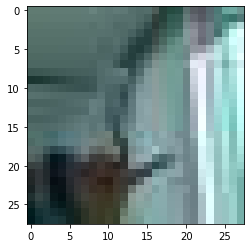

In [13]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

잘 못 분류한 테스트 데이터 수 : 18
예측확률분포: [4.5711843e-36 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
라벨: 0, 예측결과: 2


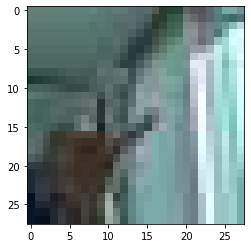

예측확률분포: [1.00000e+00 0.00000e+00 2.11238e-13 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
라벨: 2, 예측결과: 0


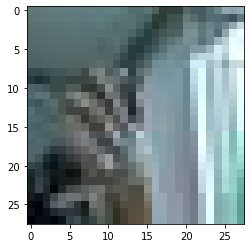

예측확률분포: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 0


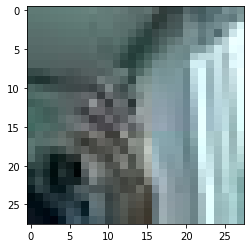

예측확률분포: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 0


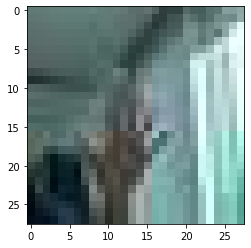

예측확률분포: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 0


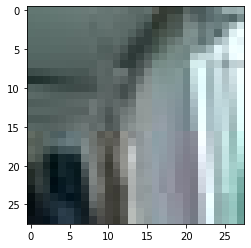

In [14]:
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

print("잘 못 분류한 테스트 데이터 수 :", len(wrong_predict_list))
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()